In [7]:
# mount drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# imports
from collections import Counter
from itertools import combinations, islice
from scipy import stats
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
from sklearn import preprocessing

warnings.filterwarnings('ignore')
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [0]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras import Sequential
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from keras.utils import np_utils
from tensorflow.keras.layers import PReLU,ReLU
from tensorflow.keras.initializers import GlorotUniform


In [0]:
filename = '/content/drive/Shared drives/ML Project/data/final_train_data_10sec.csv'
train_data = pd.read_csv(filename)

In [87]:
len(train_data)

36969

In [88]:

object = dict()
features = ['pid']
for i in range(len(features)) :
    c = features[i]
    object[i] = preprocessing.LabelEncoder()
    train_data[c] = object[i].fit_transform(train_data[c].astype(str))

train_data = train_data.dropna()

dataset = train_data.values
dataset.shape

(36969, 147)

In [90]:
xdim = 146
X = dataset[:,0:xdim].astype(float)
Y = dataset[:,xdim]
X.shape

(36969, 146)

In [0]:
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_Y)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, dummy_y, test_size=0.33, random_state=42)

In [0]:
from tensorflow.keras.optimizers import SGD, Adam

def build_model():
    model = Sequential()
    model.add(Dense(64, input_shape = (xdim,)))
    model.add(ReLU())

    # for i in range(2):
    model.add(Dense(128, activation='relu'))
    model.add(Dense(256, activation='relu'))
        
    model.add(Dropout(0.5))

    model.add(Dense(512, activation='relu'))

    model.add(Dense(2, activation='softmax'))

    opt = Adam(lr=0.001)
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics = ['accuracy'])
    return model


In [106]:
input_dim = xdim
output_dim = 2

with tf.device('/GPU:0'):
  print("Building model...")
  model = build_model()
  print("Training model...")
  history = model.fit(X_train, y_train, epochs = 10, batch_size=64, verbose=1)

  print('\nhistory dict:', history.history)

Building model...
Training model...
Epoch 1/10
388/388 [==============================] - 1s 3ms/step - loss: 4.4397 - accuracy: 0.7105 - precision_4: 0.7105 - recall_4: 0.7105
Epoch 2/10
388/388 [==============================] - 1s 3ms/step - loss: 4.5221 - accuracy: 0.7052 - precision_4: 0.7052 - recall_4: 0.7052
Epoch 3/10
388/388 [==============================] - 1s 3ms/step - loss: 4.4298 - accuracy: 0.7112 - precision_4: 0.7112 - recall_4: 0.7112
Epoch 4/10
388/388 [==============================] - 1s 3ms/step - loss: 4.4713 - accuracy: 0.7085 - precision_4: 0.7085 - recall_4: 0.7085
Epoch 5/10
388/388 [==============================] - 1s 3ms/step - loss: 4.4663 - accuracy: 0.7088 - precision_4: 0.7088 - recall_4: 0.7088
Epoch 6/10
388/388 [==============================] - 1s 3ms/step - loss: 4.4434 - accuracy: 0.7103 - precision_4: 0.7103 - recall_4: 0.7103
Epoch 7/10
388/388 [==============================] - 1s 3ms/step - loss: 4.4874 - accuracy: 0.7074 - precision_4: 0.7

In [0]:
loss_values = history.history['loss']

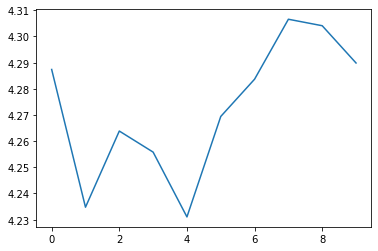

In [97]:
import matplotlib.pyplot as plt

plt.plot(loss_values)
plt.show()

In [50]:
results = model.evaluate(X_test, y_test, batch_size=64)
print('test loss, test acc:', results)

191/191 [==============================] - 0s 2ms/step - loss: 3.5942 - accuracy: 0.7657
test loss, test acc: [3.5941596031188965, 0.7656557559967041]
